In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import glob


In [29]:
def average_payoff(t_fraction, theta):
    return theta * (1 - 2 * t_fraction) + 8 * (t_fraction + t_fraction * t_fraction)

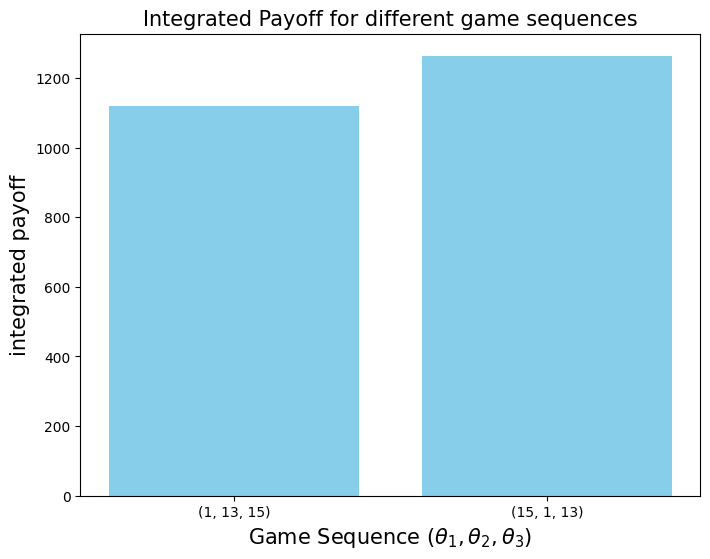

In [26]:
# Data for bar plot
x_labels = ["(1, 13, 15)", "(15, 1, 13)"]  # seq thetas
y_values = [1120.22131048, 1264.0672596]  # integrated payoff

# Create bar plot with positions
x_positions = range(len(y_values))
fig = plt.figure(figsize=(8, 6))
plt.bar(x_positions, y_values, color='skyblue')
plt.xticks(x_positions, x_labels)
plt.xlabel("Game Sequence ($\\theta_1, \\theta_2, \\theta_3$)", fontsize=15)
plt.ylabel("integrated payoff", fontsize=15)
plt.title("Integrated Payoff for different game sequences", fontsize=15)
plt.savefig("../notebooks/integrated_payoff.png", dpi=300)
plt.show()

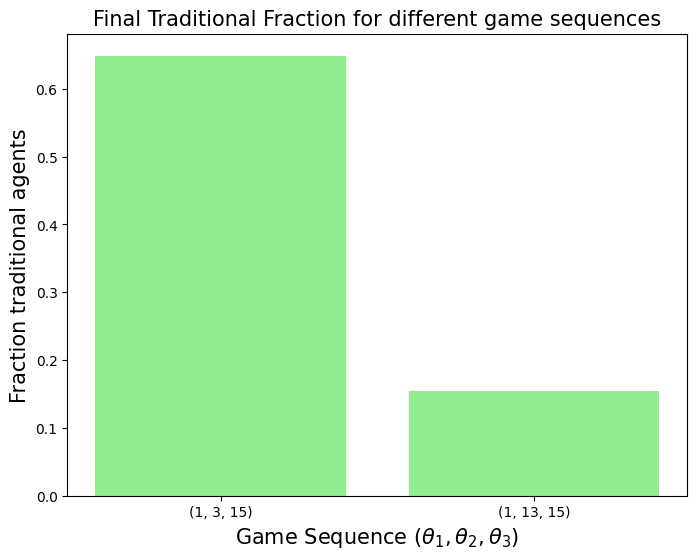

In [25]:
# Data for final Traditional (T) fraction plot
x_labels = ["(1, 3, 15)", "(1, 13, 15)"]  # seq thetas
y_values = [0.64876, 0.15432]  # final T fraction for last theta (15)

# Create bar plot with positions
x_positions = range(len(y_values))
plt.figure(figsize=(8, 6))
plt.bar(x_positions, y_values, color='lightgreen')
plt.xticks(x_positions, x_labels)
plt.xlabel("Game Sequence ($\\theta_1, \\theta_2, \\theta_3$)", fontsize=15)
plt.ylabel("Fraction traditional agents", fontsize=15)
plt.title("Final Traditional Fraction for different game sequences", fontsize=15)
plt.savefig("../notebooks/final_traditional_fraction.png", dpi=300)
plt.show()

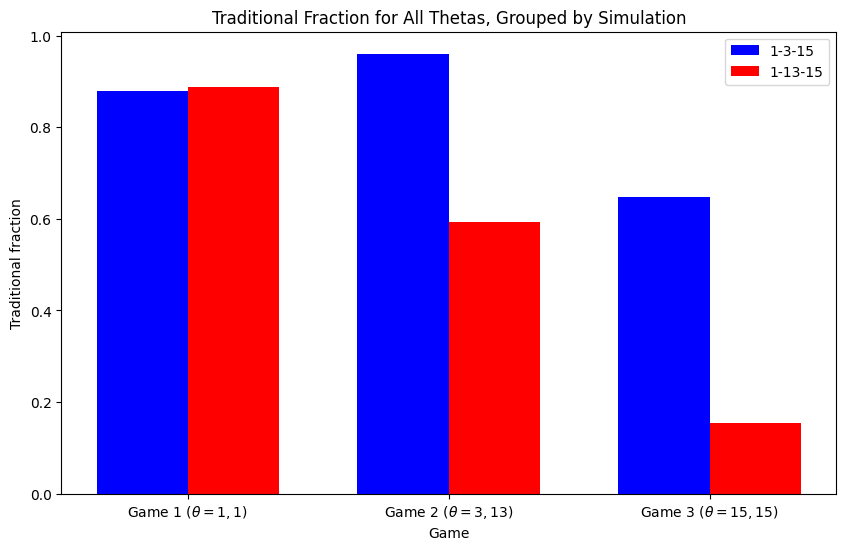

In [ ]:
# Data for all thetas, grouped by simulation

sim1_thetas = [1, 3, 15]  # Simulation 1-3-15
sim2_thetas = [1, 13, 15]  # Simulation 1-13-15

# T fractions
sim1_fracs = {'1': 0.8795999999999999, '3': 0.9604299999999999, '15': 0.64876}
sim2_fracs = {'1': 0.8879900000000001, '13': 0.59372, '15': 0.15432}

# Positions for bars
x_positions = [0, 1, 2]  # for 1,3,13,15
width = 0.35

plt.figure(figsize=(10, 6))

for i, theta in enumerate(sim1_thetas):
    plt.bar(x_positions[i] - width/2, sim1_fracs[str(theta)], width, color='blue', label='Simulation 1 (1-3-15)' if i == 0 else "")

for i, theta in enumerate(sim2_thetas):
    plt.bar(x_positions[i] + width/2, sim2_fracs[str(theta)], width, color='red', label='Simulation 2 (1-13-15)' if i == 0 else "")

plt.xticks(x_positions, ['Game 1 ($\\theta = 1, 1$)', 'Game 2 ($\\theta = 3, 13$)', 'Game 3 ($\\theta = 15, 15$)'])
plt.xlabel("Game")
plt.ylabel("Traditional fraction")
plt.title("Traditional Fraction for All Thetas, Grouped by Simulation")
plt.legend()
plt.savefig("../notebooks/all_thetas_traditional_fraction.png", dpi=300)
plt.show()

In [40]:
fnames = glob.glob('../results/*/*.pkl')
results = []
for fname in fnames:
    with open(fname, 'rb') as f:
        data = pickle.load(f)
    results.append(data)

In [41]:
result_index = 0
integrated_payoff = 0
for theta in results[result_index]:
    print(theta)
    average_payoff_ensemble = []
    for ensemble in results[result_index][theta]:

        strategies = np.array(results[result_index][theta][ensemble]['strategies'])
        mapped_matrix = np.where(strategies == 'T', 1, 0)
        fraction_t = np.mean(mapped_matrix, axis=0)
        average_payoff_ensemble.append(average_payoff(fraction_t, theta))

    average_payoff_ensemble = np.array(average_payoff_ensemble)
    integrated_payoff += np.sum(np.mean(average_payoff_ensemble, axis=0))
print(integrated_payoff)

15
1
13
1251.6994317600002


In [42]:
result_index = 1
integrated_payoff = 0
for theta in results[result_index]:
    print(theta)
    average_payoff_ensemble = []
    for ensemble in results[result_index][theta]:

        strategies = np.array(results[result_index][theta][ensemble]['strategies'])
        mapped_matrix = np.where(strategies == 'T', 1, 0)
        fraction_t = np.mean(mapped_matrix, axis=0)
        average_payoff_ensemble.append(average_payoff(fraction_t, theta))

    average_payoff_ensemble = np.array(average_payoff_ensemble)
    integrated_payoff += np.sum(np.mean(average_payoff_ensemble, axis=0))
print(integrated_payoff)

1
13
15
1120.2213104799998


In [43]:
result_index = 2
integrated_payoff = 0
for theta in results[result_index]:
    print(theta)
    average_payoff_ensemble = []
    for ensemble in results[result_index][theta]:

        strategies = np.array(results[result_index][theta][ensemble]['strategies'])
        mapped_matrix = np.where(strategies == 'T', 1, 0)
        fraction_t = np.mean(mapped_matrix, axis=0)
        average_payoff_ensemble.append(average_payoff(fraction_t, theta))

    average_payoff_ensemble = np.array(average_payoff_ensemble)
    integrated_payoff += np.sum(np.mean(average_payoff_ensemble, axis=0))
print(integrated_payoff)

15
1
13
1264.0672596


In [44]:
result_index = 3
integrated_payoff = 0
for theta in results[result_index]:
    print(theta)
    average_payoff_ensemble = []
    for ensemble in results[result_index][theta]:

        strategies = np.array(results[result_index][theta][ensemble]['strategies'])
        mapped_matrix = np.where(strategies == 'T', 1, 0)
        fraction_t = np.mean(mapped_matrix, axis=0)
        average_payoff_ensemble.append(average_payoff(fraction_t, theta))

    average_payoff_ensemble = np.array(average_payoff_ensemble)
    integrated_payoff += np.sum(np.mean(average_payoff_ensemble, axis=0))
print(integrated_payoff)



1
3
15
1164.7659724


| θ₁ | θ₂ | θ₃ | Integrated Payoff |
| -- | -- | -- | ----------------- |
| 15 | 1  | 13 | 1251.69943176     |
| 15 | 1  | 13 | 1264.0672596      |
| 1  | 13 | 15 | 1120.22131048     |
| 1  | 3  | 15 | 1164.7659724      |
